# Effect of Loan Application Features on Annual Percentage Rate (APR) and loan Status.
## by Adegboye Okikioluwa

## Investigation Overview
In this analysis, I looked at how features or informations of a borrowers loan affected the APR charges added to loans and the outcome or loan status of the loans. The Features used were the loan amount, prosper ratings, term, debt income ratio, income, and bank credits.

## Dataset Overview
The dataset contained informations of 113917 loans from Prosper loans company in the United States of America.The informations included BorrowerAPR, loan status, term, Prosper rating, loan amount, debt to income ratio, available bank card credits etc. 872 data points were removed due to duplications and inconsistencies

In [164]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [165]:
# load in the dataset into a pandas dataframe
loandata = pd.read_csv('loandata.csv')

In [166]:
arr = ['AA','A','B','C','D','E','NC','HR']

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of APR
The Distribution of APR looks almost Bimodal showing that most loans had an Annual Percentage Rate between 0.18 - 0.2, with a very sharp peak at about 0.36. We can also see a peak at about 0.3 also.

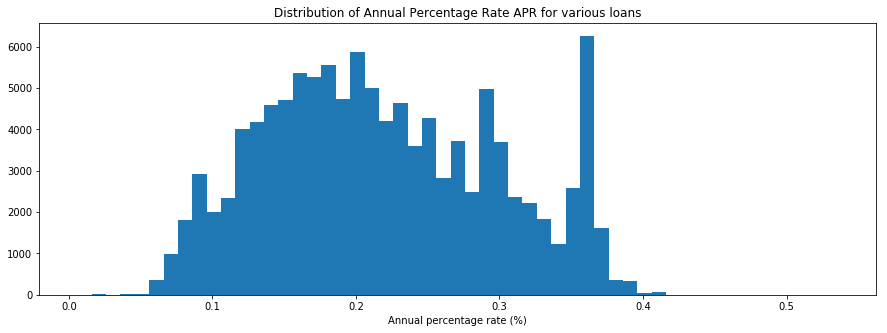

In [167]:
finite_APR = loandata[np.isfinite(loandata['BorrowerAPR'])]

plt.figure(figsize=(15,5))
bins = np.arange(0.006, 0.53+0.01, 0.01)
plt.hist(data=finite_APR, x='BorrowerAPR', bins=bins);
plt.title('Distribution of Annual Percentage Rate APR for various loans')
plt.xlabel('Annual percentage rate (%)');

## Distribution of Loan Status
Most Loans are currently on going with no due payments, followed by a high amount of completed loans and few Past Due, Defualted, and Charged off loans, we have very little data on Cancelled and Final Payment in progress loans.

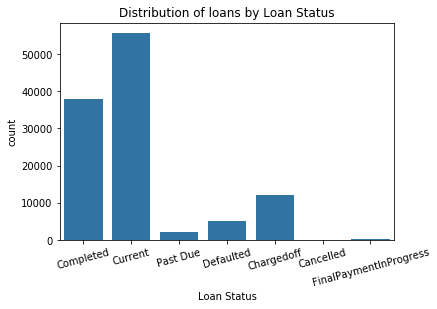

In [168]:
color = sb.color_palette()[0]
sb.countplot(data=loandata, x='newStatus', color=color)
plt.title('Distribution of loans by Loan Status')
plt.xlabel('Loan Status')
plt.xticks(rotation=15);

## BorrowerAPR vs Loan Status
Loans that were Past Due, Defualted, and Charged off had a Higher average APR, while current and completed loans had lower APR.

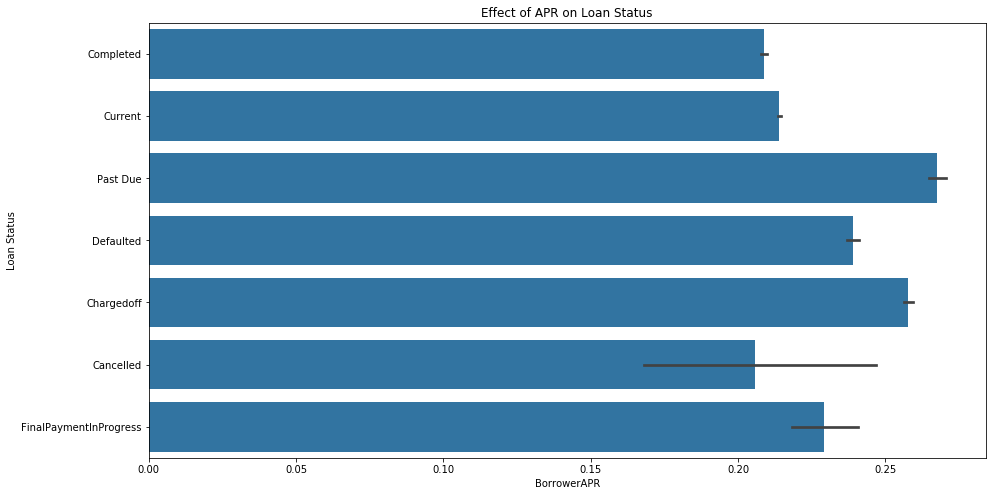

In [169]:
plt.figure(figsize=(15,8))
sb.barplot(data=loandata, x='BorrowerAPR', y='newStatus', color=color)
plt.ylabel('Loan Status')
plt.title('Effect of APR on Loan Status');

## DebtToIncomeRatio vsLoan Status |  AvailableBankcardCredit and AvailableBankcardCredit vs Prosper Rating
Loans that were Past Due, Defualted, and Charged off were by people with a higher debt income ratio. A high available bank credit is associated with low debt income ratio, while a low available bank credit is associated with a high debt income ratio. The bank credits also has a strong effect on prosper ratings, high prosper ratings are given to loans with high available bank credit.
All this would mean that a person with little money might have high debt income ratio, have a low rating and may not be able to complete a loans payment

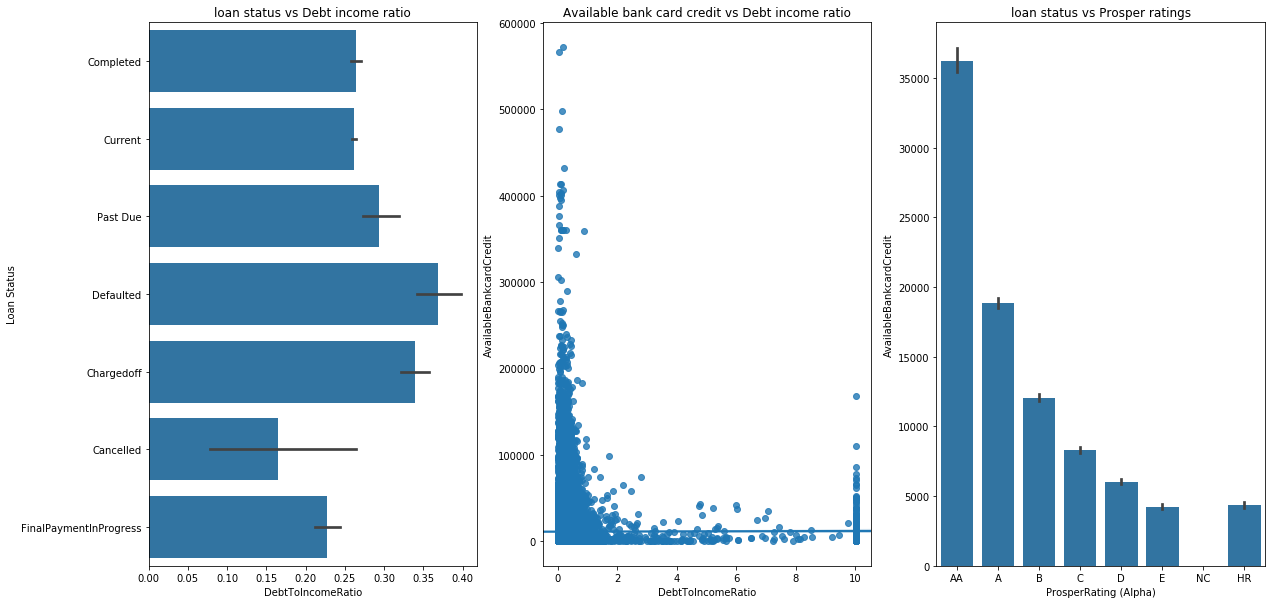

In [170]:
fig, ax = plt.subplots(ncols=3, figsize=[20,10])

sb.barplot(data=loandata, y='newStatus', x='DebtToIncomeRatio', color=color, ax=ax[0]);
ax[0].set_title('loan status vs Debt income ratio')
ax[0].set_ylabel('Loan Status')
sb.regplot(data=loandata, y='AvailableBankcardCredit', x='DebtToIncomeRatio', ax=ax[1]);
ax[1].set_title('Available bank card credit vs Debt income ratio')
sb.barplot(data=loandata, y='AvailableBankcardCredit', x='ProsperRating (Alpha)',
           order=arr, color=color, ax=ax[2])
ax[2].set_title('loan status vs Prosper ratings');

#plt.tight_layout();

## BorrowerAPR vs Prosper rating
BorrowerAPR decreases with increase in prosper ratings(or high ratings AA, A, B) and is high or increases for low ratings. This shows that the rating given by the company has strong effect on the charges or rates of a loan.

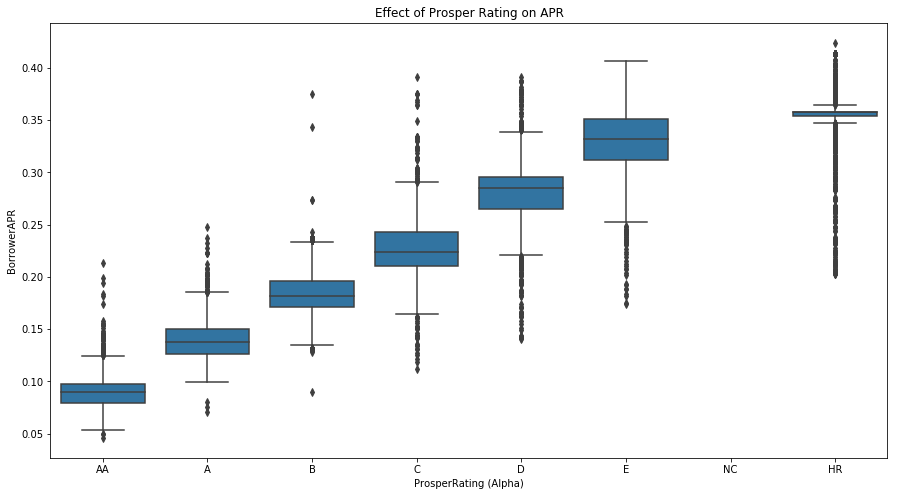

In [171]:
plt.figure(figsize=(15,8))
sb.boxplot(data=loandata, y='BorrowerAPR', x='ProsperRating (Alpha)', order=arr, color=color)
plt.title('Effect of Prosper Rating on APR');

## BorrowerAPR vs Loan amount by Prosper rating
First, an increase in loan amount leads to a decrease in APR, while a decrease in loan amount leads to an increase in APR.
The APR decreases with higher rating. Although most of the loan data are low, the loan amount increases with higher prosper ratings.

With better ratings from AA to A, the higher the Loan amount the higher the APR, this may have been so becuase people with high ratings may be able to pay high charges hence more profit for the loan company. While from B to HR ratings, the higher the loan amount the lower the APR. This may have been done to allow people who request for small loans to request for even more due to pay lesser charges on loans.

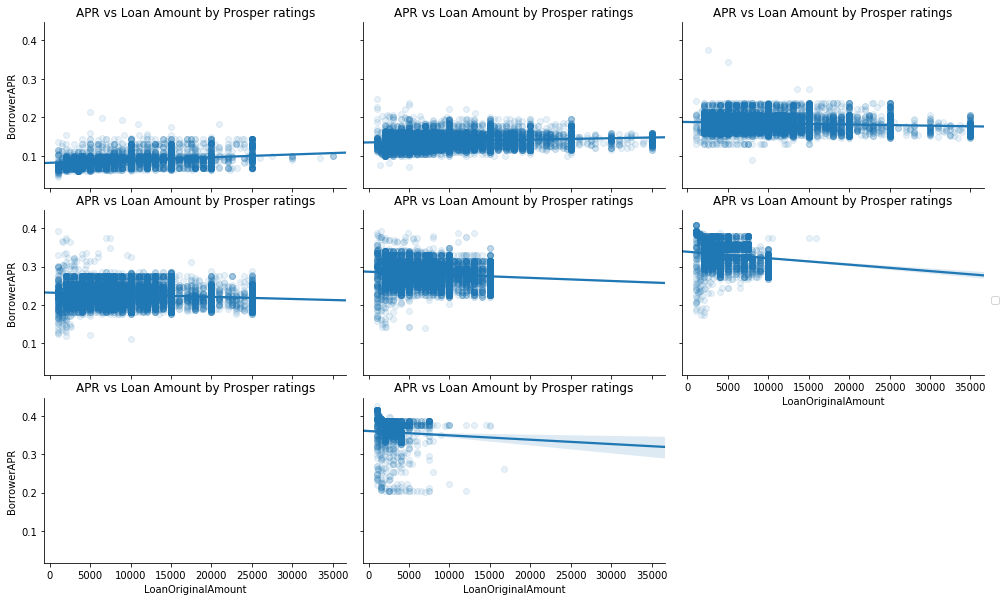

In [172]:
g = sb.FacetGrid(data = loandata, col = 'ProsperRating (Alpha)', col_order=arr, col_wrap=3, size = 5)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', scatter_kws={'alpha':1/10})
g.set(title=('APR vs Loan Amount by Prosper ratings'))
g.add_legend()
g.fig.set_size_inches(14, 8);

## BorrowerAPR vs Prosper Ratings by Term
A borrower having a high rating and short term will pay less charges on a loan(for AA - B). If a borrower has a low rating(C - HR), it will be better to have a longer term to pay less charges or have a lower APR on loan, althogh it can not be as low as the later.

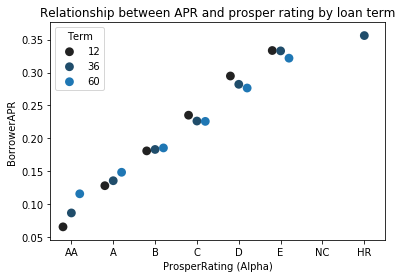

In [173]:
sb.pointplot(data=loandata, x='ProsperRating (Alpha)', y='BorrowerAPR', dodge=0.4, hue='Term', linestyles='', order=arr, color=color);
plt.title('Relationship between APR and prosper rating by loan term');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [174]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 617358 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
